# Phishing email detection using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('../RawData/PhishingEmailDetection/Phishing_Email.csv', index_col=0)

In [3]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [4]:
df.shape

(18650, 2)

Check if there's any NA values in the data, drop the row if there's any

In [5]:
df.isna().sum()

Email Text    16
Email Type     0
dtype: int64

In [6]:
df = df.dropna()
df = df.drop_duplicates()
df.isna().sum()

Email Text    0
Email Type    0
dtype: int64

In [7]:
df.shape

(17538, 2)

In [8]:
df['Email Type'].value_counts()

Safe Email        10980
Phishing Email     6558
Name: Email Type, dtype: int64

There's an imbalance between safe email and phishing email. Safe email will be downsampled in order to have an equal representation of both classes.

In [9]:
safe_email = df[df['Email Type'] == 'Safe Email']
phishing_email = df[df['Email Type'] == 'Phishing Email']
print(safe_email.shape, phishing_email.shape)

(10980, 2) (6558, 2)


In [10]:
safe_email = safe_email.sample(phishing_email.shape[0])
print(safe_email.shape, phishing_email.shape)

(6558, 2) (6558, 2)


In [11]:
balanced_df = pd.concat([safe_email, phishing_email], ignore_index=True)
balanced_df.head()

,Email Text,Email Type
0,"re : research sign off steve , sign - off from...",Safe Email
1,"On Fri, 13 Sep 2002 the voices made carlo@alin...",Safe Email
2,re : monday presentation corrected i made a fe...,Safe Email
3,"re : fed ex from iris sounds good to me , vinc...",Safe Email
4,new reference title john benjamins publishing ...,Safe Email


Use tfidf to extract features from the email body text, and also eliminate all english stop words.

In [14]:
tfidf = TfidfVectorizer(stop_words="english",max_features=10000) #dimension reduction

X = tfidf.fit_transform(balanced_df["Email Text"]).toarray()
y = np.array(balanced_df['Email Type']) # convert the label into numpy array

### Split data into training and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Random Forest

In [16]:
rf = RandomForestClassifier(n_estimators=10)

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [18]:
rf_y_pred = rf.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [20]:
print(f"accuracy from random forest: {accuracy_score(y_test,rf_y_pred)*100:.2f} %")
print("classification report :\n\n",classification_report(y_test,rf_y_pred))

accuracy from native bayes: 95.54 %
classification report :

                 precision    recall  f1-score   support

Phishing Email       0.94      0.97      0.96      1366
    Safe Email       0.97      0.94      0.95      1258

      accuracy                           0.96      2624
     macro avg       0.96      0.95      0.96      2624
  weighted avg       0.96      0.96      0.96      2624



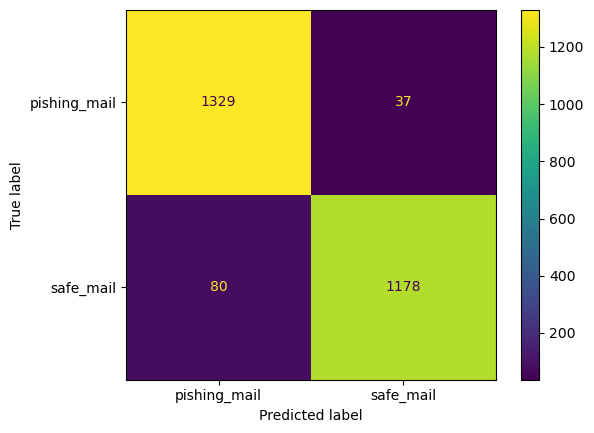

In [21]:
cm = confusion_matrix(y_test, rf_y_pred)
cx_ = ConfusionMatrixDisplay(cm,display_labels=['pishing_mail','safe_mail']).plot()
plt.show()

## Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [27]:
nb_y_pred = nb.predict(X_test)

print(f"accuracy from naive bayes: {accuracy_score(y_test,nb_y_pred)*100:.2f} %")
print("classification report :\n\n",classification_report(y_test,nb_y_pred))

accuracy from naive bayes: 96.88 %
classification report :

                 precision    recall  f1-score   support

Phishing Email       0.96      0.98      0.97      1366
    Safe Email       0.97      0.96      0.97      1258

      accuracy                           0.97      2624
     macro avg       0.97      0.97      0.97      2624
  weighted avg       0.97      0.97      0.97      2624



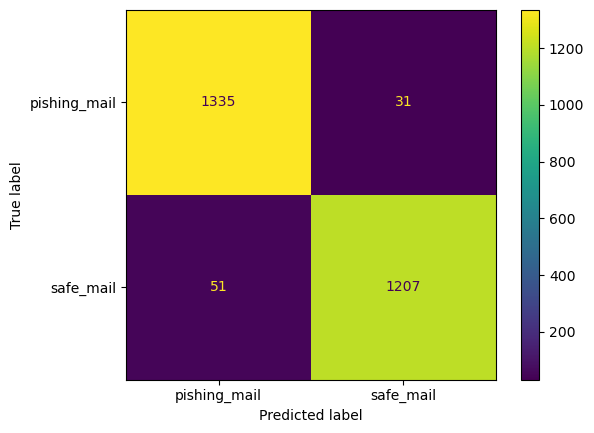

In [26]:
cm = confusion_matrix(y_test, nb_y_pred)
cx_ = ConfusionMatrixDisplay(cm,display_labels=['pishing_mail','safe_mail']).plot()
plt.show()

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [32]:
lr_y_pred = lr.predict(X_test)

print(f"accuracy from naive bayes: {accuracy_score(y_test,lr_y_pred)*100:.2f} %")
print("classification report :\n\n",classification_report(y_test,lr_y_pred))

accuracy from naive bayes: 97.68 %
classification report :

                 precision    recall  f1-score   support

Phishing Email       0.97      0.98      0.98      1366
    Safe Email       0.98      0.97      0.98      1258

      accuracy                           0.98      2624
     macro avg       0.98      0.98      0.98      2624
  weighted avg       0.98      0.98      0.98      2624



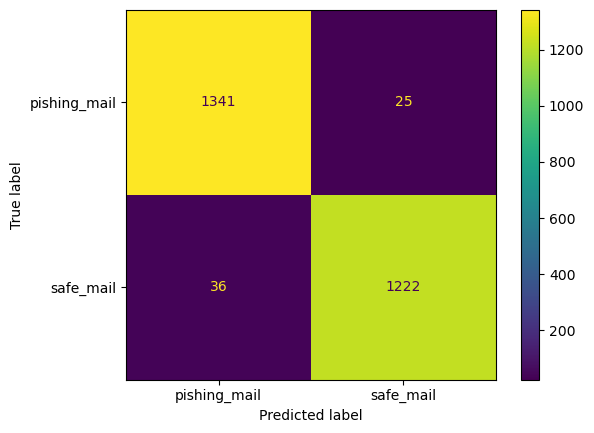

In [33]:
cm = confusion_matrix(y_test, lr_y_pred)
cx_ = ConfusionMatrixDisplay(cm,display_labels=['pishing_mail','safe_mail']).plot()
plt.show()